<a href="https://colab.research.google.com/github/SananSuleymanov/Neural_Style_Transfer/blob/main/style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os

In [2]:
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [47]:
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']= (12,12)
mpl.rcParams['axes.grid']= False

import numpy as np
import PIL.Image
import time
import functools

import tensorflow_hub as hub

In [64]:
class style:

  def load_image(self, path):
    max_dim = 512
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    shape = tf.cast(tf.shape(image)[:-1], tf.float32)

    long_dim= max(shape)

    scale = max_dim/long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(image, new_shape)
    img = img[tf.newaxis, :]

    return img

  def imshow(self, path, title=None):
    image = self.load_image(path)
    if len(image.shape)>3:
      image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
      plt.title(title)

  def transfer(self, content, style):
    hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    stylized_image = hub_model(tf.constant(content), tf.constant(style))[0]
    return stylized_image
   
  def tensor_to_image(self, tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype= np.uint8)
    if np.ndim(tensor)>3:
      assert tensor.shape[0] ==1
      tensor = tensor[0]
       
    return PIL.Image.fromarray(tensor)

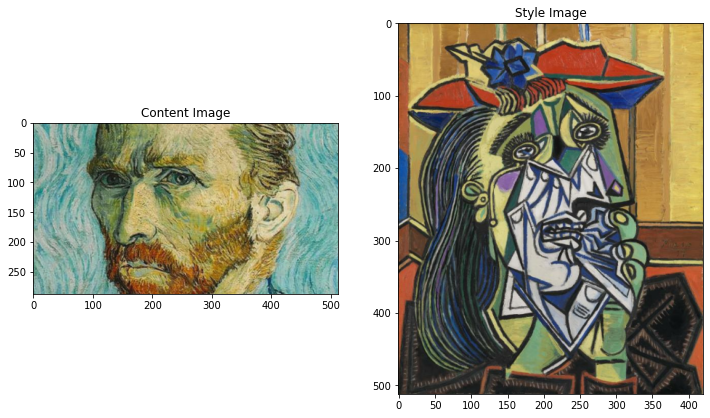

In [65]:
content_image = '/content/content.jpg'
style_image = '/content/style.jpg'
transf = style()
content = transf.load_image(content_image)
plt.subplot(1, 2, 1)
transf.imshow(content_image, 'Content Image')

style= transf.load_image(style_image)
plt.subplot(1, 2, 2)
transf.imshow(style_image, 'Style Image')

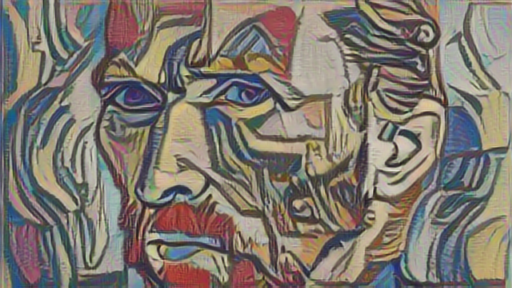

In [66]:
tensor = transf.transfer(content, style)
transf.tensor_to_image(tensor)